In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
from datetime import datetime
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist
import warnings
warnings.filterwarnings("ignore")
#import test_operators_12_02_2021_sem_lambda as top
#import tes_operators_22_02_2021_KM as top
#import test_operators_11_02_2021 as top
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

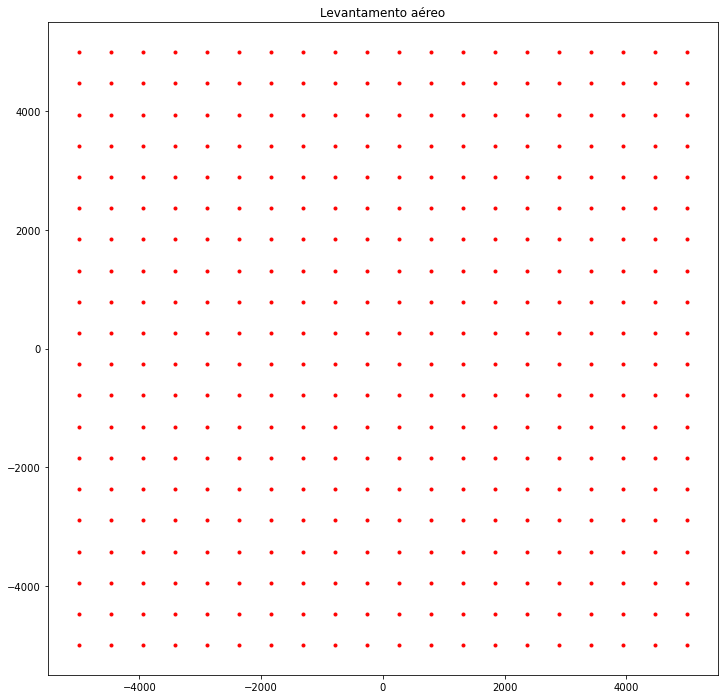

In [2]:
acquisition = {'nx': 20,
                  'ny': 20,
                  'xmin': -5000,
                  'xmax': 5000,
                  'ymin': -5000,
                  'ymax': 5000,
                  'z': -50.0,
                  'color': '.r'}


x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)


data_cubo = pd.read_table('Logfile/28_01_2021_16_20/data_mag.cvs', sep =',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))

In [3]:
final_ind_lamb0 = []
data_final_ind_lamb0 = pd.read_table('Testes_congresso/23_02_2021_20_36_lamb_0/final_ind.cvs', sep =',')
final_lamb0 = np.reshape(np.array(data_final_ind_lamb0), (31,3))
#print(np.shape(final_lamb0))
final_ind_lamb0.append(final_lamb0)
#print(final_ind_lamb0)
#print(final_ind_lamb0)
I, D = 5.0, 70.0
#print(I)
anomaly_final_ind_lamb_0 = aux_operators_array.caculation_anomaly(X, Y, Z, I, D, final_ind_lamb0)
print(np.shape(anomaly_final_ind_lamb_0))

(1, 20, 20)


In [4]:
fit_, anomaly_final_lamb0 = Operators_array.fit_value(X, Y, Z, I, D, final_ind_lamb0, anomaly_cubo)
#print(np.shape(anomaly_cubo))
#print(np.shape(anomaly_final_lamb0))
#print(anomaly_final_lamb0)
#print('+++++++++++++++++++++++++')
#print(anomaly_cubo)
final = np.reshape(anomaly_final_ind_lamb_0, (20,20))

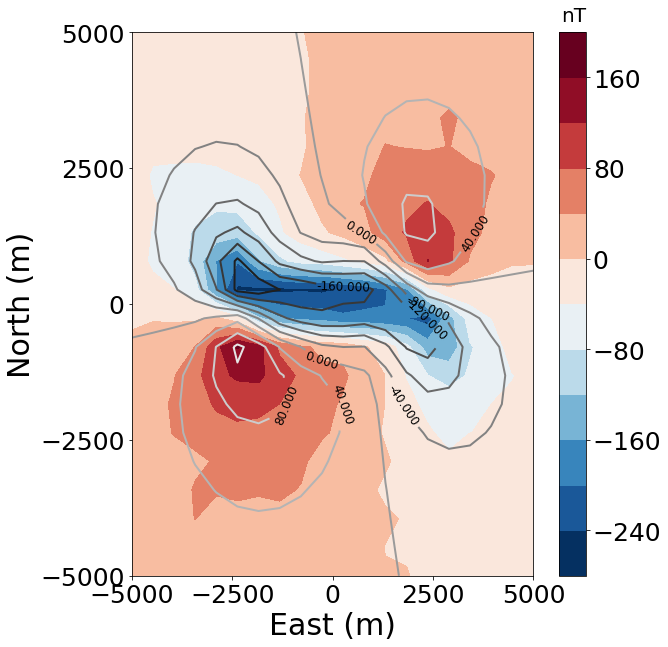

In [5]:
plt.figure(figsize=(9,10))
bolas = plt.contour(Y, X, final, levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y, X, anomaly_cubo, 10, cmap = plt.cm.RdBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 30)
plt.ylabel('North (m)', fontsize = 30)
plt.xticks(np.linspace(X.min(), X.max(), 5),fontsize = 25)
plt.yticks(np.linspace(X.min(), Y.max(), 5),fontsize = 25)
plt.text(6000,5200, 'nT', horizontalalignment = 'center', fontsize = 20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [6]:
residuo_anomaly = anomaly_cubo - final
res = np.reshape(residuo_anomaly, (400))
#print(res)

res_mu = np.mean(res)
res_sigma = np.std(res)

from scipy.stats import norm

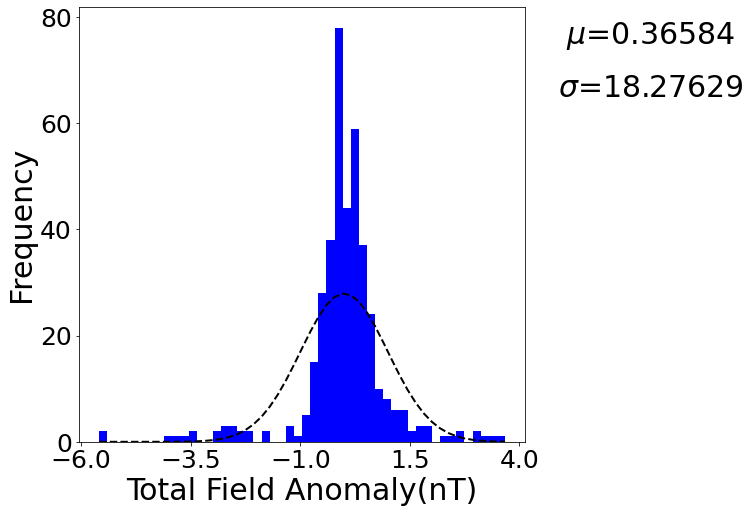

In [7]:
plt.figure(figsize=(8,8))
s = (res - res_mu) / res_sigma
s = np.ravel(s)
nbins = int(np.max(s) - np.min(s))
n, bins, patches = plt.hist(s, 50, facecolor = 'blue', alpha = 1.)
y_hist = norm.pdf(bins, np.mean(s), np.std(s))
plt.plot(bins, 70*y_hist, 'k--', linewidth = 2)
plt.xlabel('Total Field Anomaly(nT)', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)
plt.text(7,75, '$\mu$=%0.5f' % (res_mu), horizontalalignment = 'center', fontsize = 30)
plt.text(7,65, '$\sigma$=%0.5f' % (res_sigma), horizontalalignment = 'center', fontsize = 30)
plt.xticks(np.linspace(-6, 4, 5),fontsize = 25)
plt.yticks(np.linspace(0, 80, 5),fontsize = 25)
plt.show()

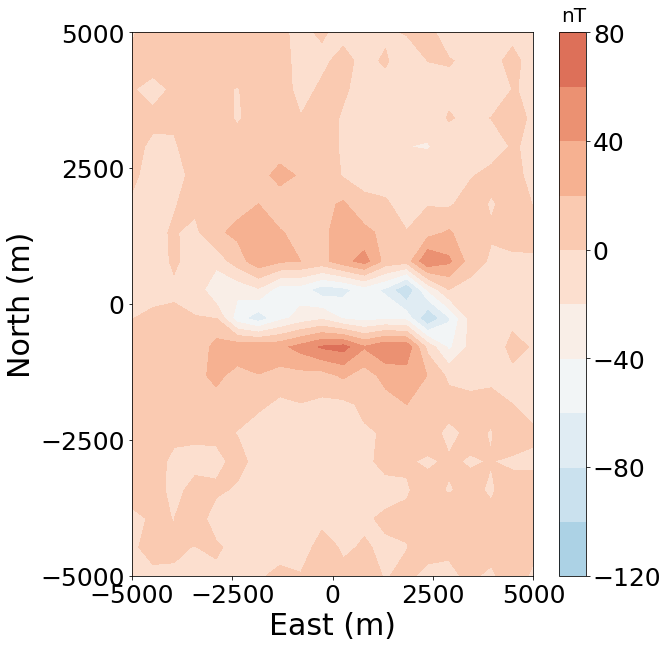

In [8]:
plt.figure(figsize=(9,10))
residuo = plt.contourf(Y, X, residuo_anomaly, 10, cmap = plt.cm.RdBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 30)
plt.ylabel('North (m)', fontsize = 30)
plt.xticks(np.linspace(X.min(), X.max(), 5),fontsize = 25)
plt.yticks(np.linspace(X.min(), Y.max(), 5),fontsize = 25)
plt.text(6000,5200, 'nT', horizontalalignment = 'center', fontsize = 20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [9]:
incl_lamb0 = pd.read_table('Testes_congresso/23_02_2021_20_36_lamb_0/incl.cvs', sep =',',names=None)
#print(incl_lamb0)
incl_lamb0 = np.reshape(np.array(incl_lamb0), (3000))
#incl_lamb0 = list(incl_lamb0)
print(incl_lamb0)

[ 3.49310612  3.32653292  1.28093722 ... -2.28825723 -2.28825723
 -2.28825723]


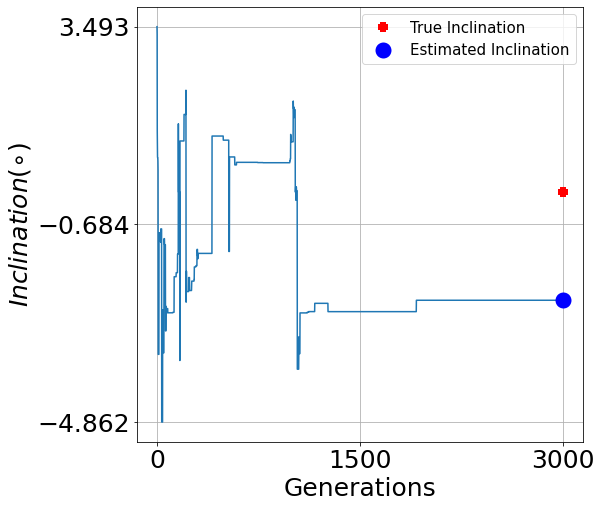

In [10]:
x = np.linspace(0, 3000, 3000)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, incl_lamb0)
incl_v = plt.plot(3000,0,'r+', mew = 10.0, label = 'True Inclination')
incl_c = plt.plot(3000,incl_lamb0[2999],'bo', mew = 10.0, label = 'Estimated Inclination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
#plt.legend([incl_v, incl_c], ['Inclinação magnética da fonte', 'Inclinação magnética calculada'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=25)
plt.ylabel('$Inclination(\circ)$', fontsize=25)
plt.xticks(np.linspace(x.min(), x.max(), 3), fontsize = 25)
plt.yticks(np.linspace(incl_lamb0.min(), incl_lamb0.max(), 3),fontsize = 25)

plt.grid()
plt.show()

In [11]:
decl_lamb0 = pd.read_table('Testes_congresso/23_02_2021_20_36_lamb_0/decl.cvs', sep =',',names=None)
#print(incl_lamb0)
decl_lamb0 = np.reshape(np.array(decl_lamb0), (3000))

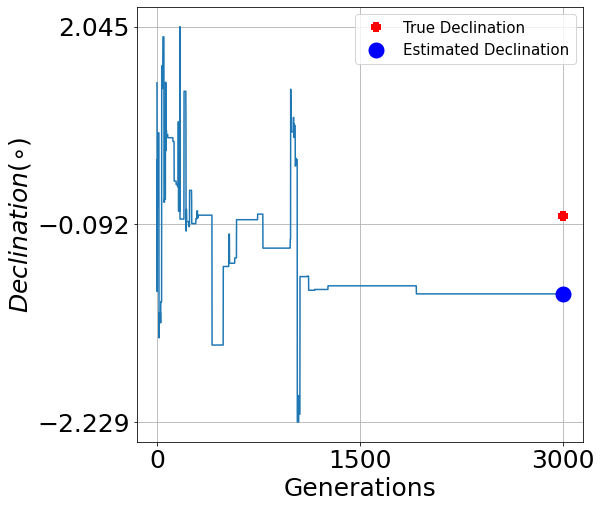

In [12]:
x = np.linspace(0, 3000, 3000)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, decl_lamb0)
decl_v = plt.plot(3000,0,'r+', mew = 10.0, label = 'True Declination')
decl_c = plt.plot(3000,decl_lamb0[2999],'bo', mew = 10.0, label = 'Estimated Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=25)
plt.ylabel('$Declination(\circ)$', fontsize=25)
plt.xticks(np.linspace(x.min(), x.max(), 3), fontsize = 25)
plt.yticks(np.linspace(decl_lamb0.min(), decl_lamb0.max(), 3),fontsize = 25)
plt.grid()
plt.show()

In [13]:
gamma_lamb0 = pd.read_table('Testes_congresso/23_02_2021_20_36_lamb_0/gamma.cvs', sep =',',names=None)
#print(incl_lamb0)
gamma_lamb0 = np.reshape(np.array(gamma_lamb0), (3000))

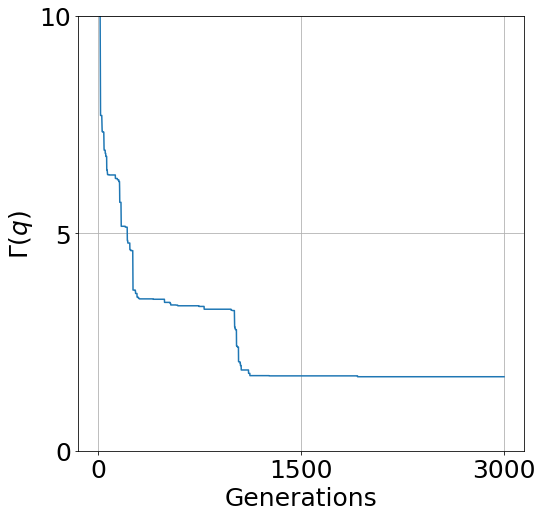

In [18]:
x = np.linspace(0, 3000, 3000)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, gamma_lamb0)
plt.ylim(0, 10)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=25)
plt.ylabel('$\Gamma(q)$', fontsize=25)
plt.xticks(np.linspace(x.min(), x.max(), 3), fontsize = 25)
plt.yticks(np.linspace(10, 0, 3),fontsize = 25)
plt.grid()
plt.show()